In [6]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
#using keras to load the datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Split the data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Evaluate the model
model.evaluate(x_test, y_test)


Epoch 1/10
1500/1500 [==============================] - 50s 32ms/step - loss: 0.4723 - accuracy: 0.8304 - val_loss: 0.3561 - val_accuracy: 0.8712
Epoch 2/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.3174 - accuracy: 0.8852 - val_loss: 0.2977 - val_accuracy: 0.8902
Epoch 3/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.2689 - accuracy: 0.9000 - val_loss: 0.2831 - val_accuracy: 0.8959
Epoch 4/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.2388 - accuracy: 0.9118 - val_loss: 0.2712 - val_accuracy: 0.9013
Epoch 5/10
1500/1500 [==============================] - 45s 30ms/step - loss: 0.2125 - accuracy: 0.9229 - val_loss: 0.2657 - val_accuracy: 0.9046
Epoch 6/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.1890 - accuracy: 0.9308 - val_loss: 0.2558 - val_accuracy: 0.9061
Epoch 7/10
1500/1500 [==============================] - 46s 31ms/step - loss: 0.1687 - accuracy: 0.9370 - val_loss: 0.2496 -

[0.3085053563117981, 0.902899980545044]

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [7]:
model.layers

In [10]:
#using the model to make prediction
X_new = x_test[:3]  #taking first three instance of test set
y_predict = model.predict(X_new)
y_predict.round(2)


1/1 [==============================] - 0s 20ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.77, 0.  , 0.23, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [17]:
# Save the model
model.save('fashion_mnist_classifier.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 3s 11ms/step


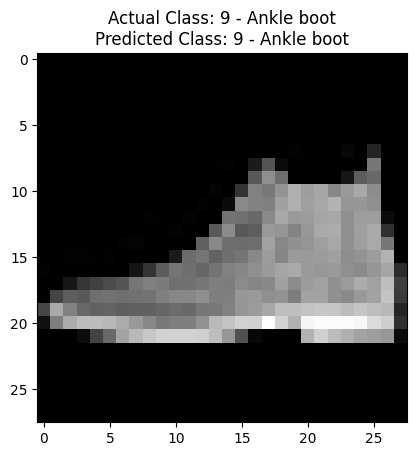

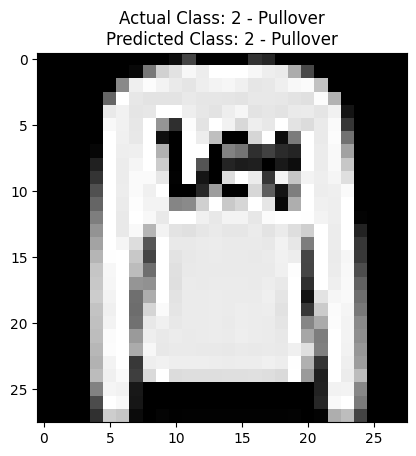

In [21]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Load the saved model
loaded_model = keras.models.load_model('fashion_mnist_classifier.h5')

# Make predictions on the test set
predictions = loaded_model.predict(x_test)

# Display some sample predictions along with the actual labels
num_samples_to_display = 2
for i in range(num_samples_to_display):
 # Display the actual label
    actual_label = y_test[i]
    actual_class = f"Actual Class: {actual_label} - {class_labels[actual_label]}"

    # Display the predicted label
    predicted_label = np.argmax(predictions[i])
    predicted_class = f"Predicted Class: {predicted_label} - {class_labels[predicted_label]}"

    # Display the image
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"{actual_class}\n{predicted_class}")
    plt.show()
